In [29]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv(Path('Resources/crypto_data.csv'))


In [31]:
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [32]:
len(df. index) 

1252

In [46]:
df1 =df.loc[df['IsTrading'] == True]
df1.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [55]:
#len(df1. index) 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   float64
dtypes: bool(1), float64(2), object(4)
memory usage: 63.7+ KB


In [52]:
df1['TotalCoinSupply'] = df1['TotalCoinSupply'].str.strip()
df1['TotalCoinSupply']  = df1['TotalCoinSupply'] != '20 000 000'

In [54]:
df1['TotalCoinSupply'] = df1['TotalCoinSupply'].astype(float)
#len(df1. index) 
df1.info()

In [7]:
for column in df1.columns:
    print(f"Column {column} has {df1[column].isnull().sum()} null values")


Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [56]:
#Remove the null values
df1 = df1.dropna()

In [57]:
len(df1. index) 

685

In [58]:
for column in df1.columns:
    print(f"Column {column} has {df1[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [59]:
df1['IsTrading'].value_counts()

True    685
Name: IsTrading, dtype: int64

In [60]:
df1 =df1.loc[df1['TotalCoinsMined'] >0]
df1.head(685)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,1.0
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,1.0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,1.0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,1.0
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,1.0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,1.0
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,1.0
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1.0
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,1.0


In [61]:
len(df1. index) 

532

In [62]:
df1.describe()

,TotalCoinsMined,TotalCoinSupply
count,5.320000e+02,532.0
mean,5.340456e+09,1.0
std,4.564568e+10,0.0
min,4.199995e+01,1.0
25%,8.359849e+06,1.0
50%,2.474397e+07,1.0
75%,1.867250e+08,1.0
max,9.899887e+11,1.0


In [63]:
df1 = df1[['Algorithm','ProofType','TotalCoinsMined','TotalCoinSupply']]

In [64]:
df1.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,1.0
2,Scrypt,PoW/PoS,1.055185e+09,1.0
5,X13,PoW/PoS,2.927942e+10,1.0
7,SHA-256,PoW,1.792718e+07,1.0
8,Ethash,PoW,1.076842e+08,1.0


In [65]:
df_dummies = pd.get_dummies(df1)
print(df_dummies.columns)
df_dummies

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#df_dummies.columns

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_dummies)
Xscaled = scaler.transform(df_dummies)
Xscaled

array([[-0.11710817,  0.        , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955,  0.        , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  0.        , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336,  0.        , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817,  0.        , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536,  0.        , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [67]:
pca = PCA(n_components=0.99)

# Get two principal components for the iris data.
Xscaled_pca = pca.fit_transform(Xscaled)
Xscaled_pca

array([[-0.27102739,  1.1154307 , -0.56868798, ..., -0.11271655,
         0.143188  , -0.11253167],
       [-0.25863537,  1.1141203 , -0.56921737, ..., -0.11265693,
         0.1433412 , -0.11222738],
       [ 0.194644  ,  1.84059722, -0.63287541, ..., -0.22055497,
        -0.39606618,  0.01356022],
       ...,
       [-0.12712387, -2.30900583,  0.40218353, ...,  0.01892243,
         0.37273214,  0.05538538],
       [-0.27252699, -2.05827377,  0.39090106, ..., -0.10359277,
         0.34910293,  0.08180892],
       [-0.13678416,  0.84838636, -0.26703818, ...,  0.51311318,
         1.01434842, -0.05287659]])

In [21]:
# Fetch the explained variance
#pca.explained_variance_ratio_

In [68]:
 # Initialize t-SNE model
tsne = TSNE(learning_rate=35)
 # Reduce dimensions
tsne_features = tsne.fit_transform(Xscaled_pca)
# The dataset has 2 columns
tsne_features.shape

(532, 2)

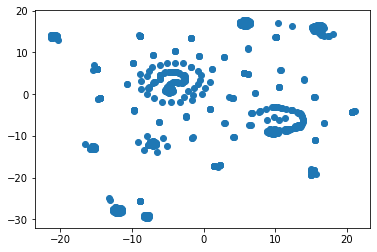

In [69]:
 # Prepare to plot the dataset
df2 = pd.DataFrame()
# The first column of transformed features
df2['x'] = tsne_features[:,0]

# The second column of transformed features
df2['y'] = tsne_features[:,1]
plt.scatter(df2['x'], df2['y'])
plt.show()

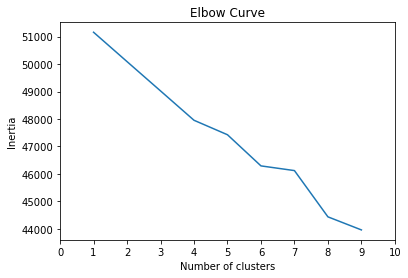

In [70]:
inertia = []
k = list(range(1,10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Xscaled_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()   

#####  In tha above plot doesn't indicate an elbow curve, there is no right number of clusters